# 과제1

비지도 학습의 목적인 Grouping에 대해 자세히 설명해 주세요! Dataset을 Grouping한다는 것이 무슨 의미인지 간단히 서술해 주시고, 세션에서 언급되었던 Grouping을 위한 두 수단에 대해서 예시 모델을 제시하여 설명해 주시면 됩니다! 예시 모델의 종류에 대해서는 구글링을 통해 조사할 수 있겠습니다.

* 데이터셋 Grouping : 하나의 데이터셋에서, 유사한 특성이나 패턴을 가진 데이터들 동일한 그룹으로 묶는 것.
- 1. 군집화(clustering) 기법
> - K-means 클러스터링 : 각 데이터 간의 거리를 기반으로 군집화하는 것. 거리 기반으로 군집화하기 때문에 이상치에 민감하고, 데이터 스케일링이 필요하다. 또한 군집의 개수를 직접 설정해줘야 하는 어려움도 있다. 이때 군집의 개수를 선택하기 위해 엘보우 method를 사용하거나, 실루엣 스코어 등을 지표로 활용할 수 있다.
> - DBSCAN 클러스터링 : 데이터 간의 밀도를 기반으로 군집화하는 것으로, K-means 군집화와 다른 점은 군집의 개수를 지정해 줄 필요가 없다는 것이다. 그 대신 기준점으로부터의 거리 epsilon과, 그 거리 내에 군집이 이뤄지기 위한 최소한의 점의 개수 min_samples를 지정해야 한다.
> - K-means는 구형인 데이터셋 군집화에 유리한 반면, DBSCAN은 좀 더 기하학적인 데이터셋에서 군집화할 때 유리하다.

- 2. 차원 축소 기법
> - PCA : 현재 데이터셋의 k개 특성들을 조합해, 완전히 새로운 특성을 추출해 내는 것. 기존 특성들의 공간에서, 분산이 가장 큰 순서대로 축을 측정해 새로운 변수를 k개 만들고, 이들 중 유의미한 변수들만 남김으로써 차원을 축소하는 모델이다.

# 과제2

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/와이빅타/diabetes.csv')

In [166]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [168]:
x_columns = list(df.columns)
x_columns.remove('Outcome')

## EDA

### 분포도

In [169]:
sns.set_palette('winter')

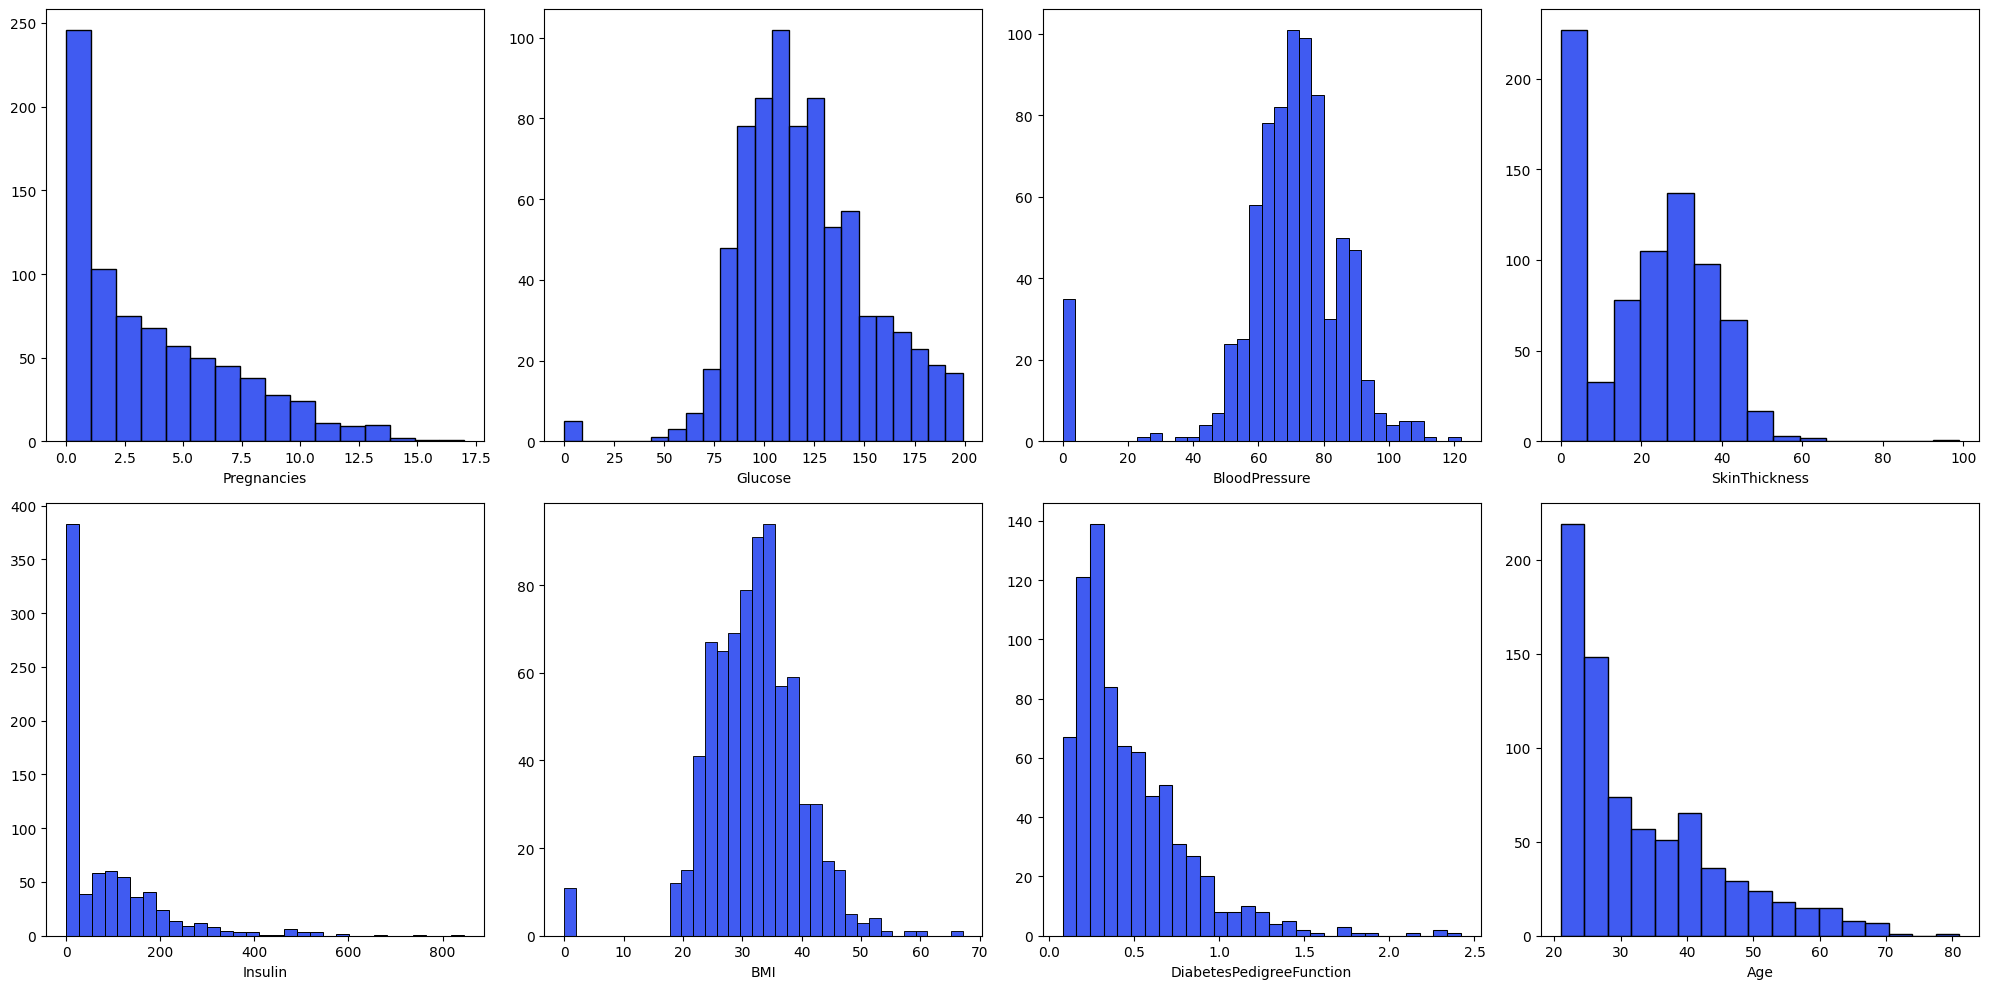

In [170]:
plt.figure(figsize=(20,10))
n=1
for v in x_columns:
    ax = plt.subplot(2,4,n)
    sns.histplot(df[v])
    plt.ylabel('')
    n+=1
plt.tight_layout()

<Axes: xlabel='Outcome', ylabel='Count'>

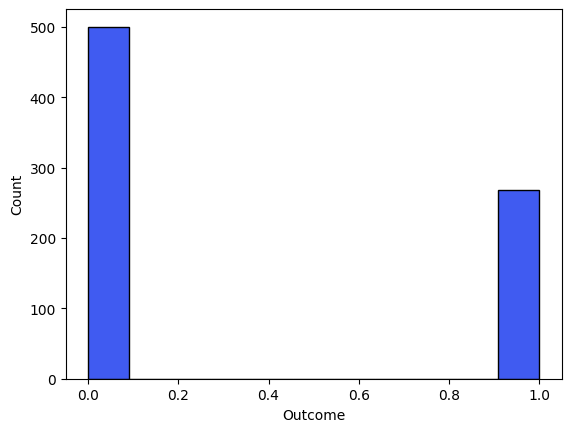

In [220]:
sns.histplot(df['Outcome']);

### 결측치

In [171]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 이상치

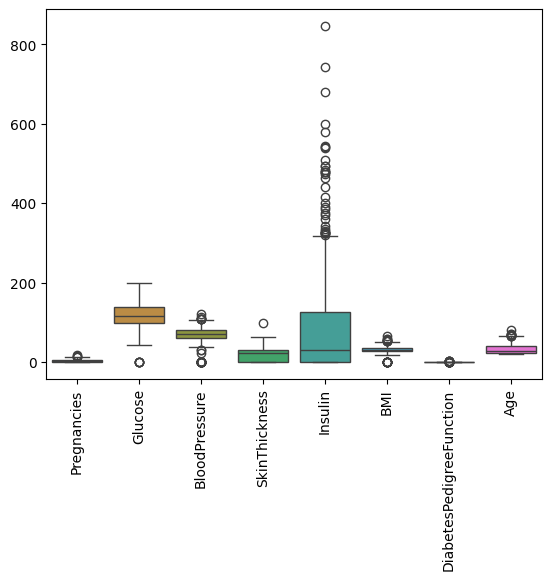

In [172]:
plt.xticks(rotation=90)
sns.boxplot(df[x_columns]);

### 상관계수 행렬 및 VIF 스코어

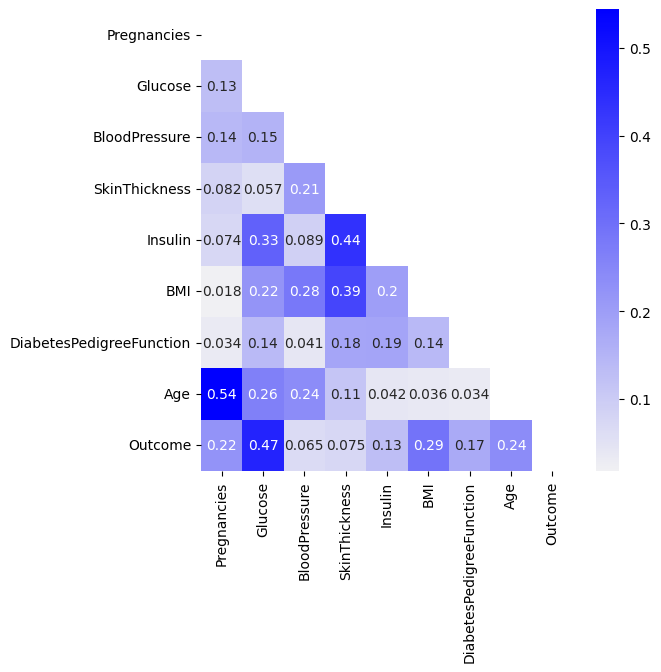

In [173]:
cmap = sns.light_palette("blue", as_cmap = True)
plt.figure(figsize=(6,6))
corr_matrix = df.corr()
abs_corr_matrix = np.abs(corr_matrix)

mask = np.zeros_like(abs_corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(abs_corr_matrix, annot = True, cmap = cmap, mask = mask)
plt.show()

In [174]:
def calc_vif(df):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df[x_columns])

,variables,VIF
0,Pregnancies,3.275748
1,Glucose,16.725078
2,BloodPressure,14.619512
3,SkinThickness,4.008696
4,Insulin,2.063689
5,BMI,18.408884
6,DiabetesPedigreeFunction,3.195626
7,Age,13.492985


## FE

In [175]:
df_copy = df.copy()

X = df_copy[x_columns]
y = df_copy['Outcome']

train_X, test_X, train_y, test_y = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 123)

* Glucose, BMI, Insulin, BloodPressure, SkinThickness 변수에서 0이 나타남을 볼 수 있음
> 상식적으로 해당 변수들에서 수치가 0이 나오는 것은 말이 되지 않기 때문에 처리가 필요            

In [176]:
train_X_copy = train_X.copy(deep = True)
train_X_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = train_X_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

test_X_copy = test_X.copy(deep = True)
test_X_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = test_X_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(train_X_copy.isnull().sum())
print('*'*30)
print(test_X_copy.isnull().sum())

Pregnancies                   0
Glucose                       3
BloodPressure                28
SkinThickness               186
Insulin                     300
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64
******************************
Pregnancies                  0
Glucose                      2
BloodPressure                7
SkinThickness               41
Insulin                     74
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
dtype: int64


Glucose, BMI, BloodPreasure는 0인 값이 적으므로 각 변수들의 평균값으로 대체하기로 결정

In [177]:
train_X[['Glucose','BloodPressure','BMI']] = train_X[['Glucose','BloodPressure','BMI']].replace(0,np.NaN)

train_X['Glucose'].fillna(train_X['Glucose'].mean(), inplace = True)
train_X['BloodPressure'].fillna(train_X['BloodPressure'].mean(), inplace = True)
train_X['BMI'].fillna(train_X['BMI'].mean(), inplace = True)

In [178]:
test_X[['Glucose','BloodPressure','BMI']] = test_X[['Glucose','BloodPressure','BMI']].replace(0,np.NaN)

test_X['Glucose'].fillna(test_X['Glucose'].mean(), inplace = True)
test_X['BloodPressure'].fillna(test_X['BloodPressure'].mean(), inplace = True)
test_X['BMI'].fillna(test_X['BMI'].mean(), inplace = True)

In [179]:
train_X_copy = train_X.copy(deep = True)
train_X_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = train_X_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

test_X_copy = test_X.copy(deep = True)
test_X_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = test_X_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(train_X_copy.isnull().sum())
print('*'*30)
print(test_X_copy.isnull().sum())

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               186
Insulin                     300
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
dtype: int64
******************************
Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness               41
Insulin                     74
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
dtype: int64


* 인슐린과 SkinThickness는 각각 해당 변수를 제외하고 예측해 값을 채우기로 결정

In [180]:
#인슐린 채우기

non_zero = train_X[train_X['Insulin']>0]
non_zero = non_zero.drop(columns = 'SkinThickness')

In [181]:
non_zero_x = non_zero.drop(columns = 'Insulin')
non_zero_y = non_zero['Insulin']

In [182]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, GridSearchCV

In [184]:
dtr = DecisionTreeRegressor(random_state = 123)
kf = KFold(n_splits = 5, shuffle = True, random_state = 123)

In [185]:
param_grid = {
    'max_depth': range(3,10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': [1, 2, 3, 4],
    'max_leaf_nodes' : range(2, 10)
}


grid_search = GridSearchCV(estimator=dtr, scoring='neg_mean_absolute_error', param_grid=param_grid, cv=kf)

grid_search.fit(non_zero_x, non_zero_y)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 3, 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 9}
Best CV Score: -68.34009740052093


In [186]:
insulin_dtr = grid_search.best_estimator_
insulin_dtr.fit(non_zero_x, non_zero_y)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=8, min_samples_leaf=4,
                      min_samples_split=9, random_state=123)

In [187]:
insulin_zero = train_X[train_X['Insulin'] == 0]

X_predict = insulin_zero.drop(columns = ['Insulin', 'SkinThickness'])

predicted_values = insulin_dtr.predict(X_predict)

In [188]:
predicted_values

array([ 53.52631579,  53.52631579, 184.30927835, 184.30927835,
       134.88461538, 184.30927835, 134.88461538, 134.88461538,
       134.88461538,  96.27027027, 134.88461538, 184.30927835,
        96.27027027, 134.88461538, 264.44827586,  53.52631579,
       134.88461538, 184.30927835,  96.27027027,  53.52631579,
       134.88461538,  96.27027027,  53.52631579, 184.30927835,
       134.88461538, 184.30927835, 134.88461538, 134.88461538,
       134.88461538, 480.8       ,  96.27027027, 134.88461538,
       134.88461538,  96.27027027, 134.88461538, 184.30927835,
       264.44827586, 134.88461538, 264.44827586, 184.30927835,
       134.88461538, 184.30927835,  53.52631579, 184.30927835,
        96.27027027,  53.52631579, 134.88461538, 184.30927835,
       134.88461538,  53.52631579,  96.27027027, 184.30927835,
       184.30927835, 134.88461538, 134.88461538, 264.44827586,
       264.44827586, 134.88461538, 134.88461538, 134.88461538,
       184.30927835, 134.88461538, 184.30927835, 292.2 

In [189]:
train_X.loc[train_X['Insulin'] == 0,'Insulin'] = predicted_values

In [190]:
train_X['Insulin'].value_counts()

184.309278    86
134.884615    76
96.270270     49
53.526316     40
264.448276    31
              ..
22.000000      1
108.000000     1
392.000000     1
402.000000     1
144.000000     1
Name: Insulin, Length: 173, dtype: int64

In [191]:
#SkinThickness 채우기

non_zero = train_X[train_X['SkinThickness']>0]
non_zero = non_zero.drop(columns = 'Insulin')

In [192]:
non_zero_x = non_zero.drop(columns = 'SkinThickness')
non_zero_y = non_zero['SkinThickness']

In [193]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, GridSearchCV

In [194]:
dtr = DecisionTreeRegressor(random_state = 123)
kf = KFold(n_splits = 5, shuffle = True, random_state = 123)

In [195]:
param_grid = {
    'max_depth': range(3,10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': [1, 2, 3, 4],
    'max_leaf_nodes' : range(2, 10)
}


grid_search = GridSearchCV(estimator=dtr, scoring='neg_mean_absolute_error', param_grid=param_grid, cv=kf)

grid_search.fit(non_zero_x, non_zero_y)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 4, 'min_samples_split': 9}
Best CV Score: -6.386313741316326


In [196]:
SkinThickness_dtr = grid_search.best_estimator_
SkinThickness_dtr.fit(non_zero_x, non_zero_y)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=8, min_samples_leaf=4,
                      min_samples_split=9, random_state=123)

In [197]:
SkinThickness_zero = train_X[train_X['SkinThickness'] == 0]

X_predict = SkinThickness_zero.drop(columns = ['Insulin', 'SkinThickness'])

predicted_values = SkinThickness_dtr.predict(X_predict)

In [198]:
predicted_values

array([24.86363636, 24.86363636, 31.86792453, 31.86792453, 29.66666667,
       24.10526316, 24.10526316, 24.86363636, 37.69892473, 24.86363636,
       51.        , 18.7625    , 29.66666667, 37.69892473, 29.66666667,
       24.86363636, 37.69892473, 29.66666667, 24.86363636, 29.66666667,
       29.66666667, 29.66666667, 29.66666667, 46.45454545, 37.69892473,
       37.69892473, 24.86363636, 37.69892473, 24.10526316, 24.10526316,
       24.86363636, 18.7625    , 29.66666667, 24.10526316, 31.86792453,
       37.69892473, 37.69892473, 46.45454545, 24.86363636, 31.86792453,
       24.10526316, 29.66666667, 18.7625    , 29.66666667, 37.69892473,
       24.86363636, 37.69892473, 51.        , 37.69892473, 24.86363636,
       18.7625    , 24.10526316, 29.66666667, 31.86792453, 46.45454545,
       18.7625    , 29.66666667, 31.86792453, 18.7625    , 18.7625    ,
       31.86792453, 24.10526316, 37.69892473, 37.69892473, 18.7625    ,
       29.66666667, 31.86792453, 24.10526316, 37.69892473, 29.66

In [200]:
train_X.loc[train_X['SkinThickness'] == 0,'SkinThickness'] = predicted_values

In [ ]:
# X_test도 똑같이 채워주기

In [203]:
test_insulin_zero = test_X[test_X['Insulin'] == 0]

X_predict = test_insulin_zero.drop(columns = ['Insulin', 'SkinThickness'])

predicted_values = insulin_dtr.predict(X_predict)

In [204]:
predicted_values

array([134.88461538,  96.27027027, 184.30927835, 184.30927835,
        96.27027027, 134.88461538,  96.27027027,  53.52631579,
       184.30927835, 134.88461538,  53.52631579, 184.30927835,
       134.88461538, 134.88461538, 184.30927835,  53.52631579,
       184.30927835,  84.75      , 184.30927835, 184.30927835,
       184.30927835, 184.30927835, 184.30927835, 134.88461538,
       134.88461538,  53.52631579, 184.30927835,  96.27027027,
        53.52631579, 134.88461538, 134.88461538,  53.52631579,
       134.88461538, 134.88461538, 134.88461538, 134.88461538,
       134.88461538, 184.30927835, 134.88461538,  53.52631579,
       134.88461538,  53.52631579, 184.30927835, 264.44827586,
        96.27027027, 134.88461538, 184.30927835, 184.30927835,
       134.88461538,  96.27027027,  96.27027027, 264.44827586,
       264.44827586, 184.30927835, 134.88461538, 264.44827586,
        53.52631579, 134.88461538, 134.88461538,  96.27027027,
       480.8       , 134.88461538, 134.88461538, 184.30

In [205]:
test_X.loc[test_X['Insulin'] == 0,'Insulin'] = predicted_values

In [207]:
test_SkinThickness_zero = test_X[test_X['SkinThickness'] == 0]

X_predict = test_SkinThickness_zero.drop(columns = ['Insulin', 'SkinThickness'])

predicted_values = SkinThickness_dtr.predict(X_predict)

In [208]:
predicted_values

array([24.10526316, 24.10526316, 24.86363636, 31.86792453, 24.86363636,
       18.7625    , 37.69892473, 29.66666667, 18.7625    , 18.7625    ,
       24.86363636, 31.86792453, 31.86792453, 18.7625    , 24.86363636,
       24.86363636, 31.86792453, 24.86363636, 31.86792453, 29.66666667,
       29.66666667, 18.7625    , 18.7625    , 31.86792453, 18.7625    ,
       31.86792453, 29.66666667, 18.7625    , 37.69892473, 24.86363636,
       37.69892473, 31.86792453, 24.10526316, 29.66666667, 31.86792453,
       37.69892473, 18.7625    , 31.86792453, 24.10526316, 37.69892473,
       29.66666667])

In [209]:
test_X.loc[test_X['SkinThickness'] == 0,'SkinThickness'] = predicted_values

In [210]:
train_X_copy = train_X.copy(deep = True)
train_X_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = train_X_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

test_X_copy = test_X.copy(deep = True)
test_X_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = test_X_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(train_X_copy.isnull().sum())
print('*'*30)
print(test_X_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
******************************
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


* 0인 값이 모두 사라졌음을 알 수 있음

* Age 변수에서 30살을 기준으로 범주화

In [211]:
print(len(train_X[train_X['Age']<=30]))
print(len(train_X[train_X['Age']>30]))

333
281


In [212]:
train_X['Older_Than_30'] = np.where(train_X['Age']>30, 1, 0)
test_X['Older_Than_30'] = np.where(test_X['Age']>30, 1, 0)

In [213]:
train_X['Older_Than_30'].value_counts()

0    333
1    281
Name: Older_Than_30, dtype: int64

* 임신횟수를 2회를 기준으로 범주화

In [214]:
print(len(train_X[train_X['Pregnancies']>2]))
print(len(train_X[train_X['Pregnancies']<=2]))

333
281


In [215]:
train_X['Pregnancies_more_than_2'] = np.where(train_X['Pregnancies']>2, 1, 0)
test_X['Pregnancies_more_than_2'] = np.where(test_X['Pregnancies']>2, 1, 0)

In [216]:
train_X['Pregnancies_more_than_2'].value_counts()

1    333
0    281
Name: Pregnancies_more_than_2, dtype: int64

In [217]:
train_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Older_Than_30,Pregnancies_more_than_2
762,9,89.0,62.0,24.863636,53.526316,22.5,0.142,33,1,1
47,2,71.0,70.0,27.000000,53.526316,28.0,0.586,22,0,0
497,2,81.0,72.0,15.000000,76.000000,30.1,0.547,25,0,0
456,1,135.0,54.0,24.863636,184.309278,26.7,0.687,62,1,0
61,8,133.0,72.0,31.867925,184.309278,32.9,0.270,39,1,1
...,...,...,...,...,...,...,...,...,...,...
112,1,89.0,76.0,34.000000,37.000000,31.2,0.192,23,0,0
646,1,167.0,74.0,17.000000,144.000000,23.4,0.447,33,1,0
751,1,121.0,78.0,39.000000,74.000000,39.0,0.261,28,0,0
79,2,112.0,66.0,22.000000,96.270270,25.0,0.307,24,0,0


In [218]:
test_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Older_Than_30,Pregnancies_more_than_2
664,6,115.0,60.0,39.0,134.884615,33.7,0.245,40,1,1
752,3,108.0,62.0,24.0,96.270270,26.0,0.223,25,0,1
243,6,119.0,50.0,22.0,176.000000,27.1,1.318,33,1,1
135,2,125.0,60.0,20.0,140.000000,33.8,0.088,31,1,0
335,0,165.0,76.0,43.0,255.000000,47.9,0.259,26,0,0
...,...,...,...,...,...,...,...,...,...,...
614,11,138.0,74.0,26.0,144.000000,36.1,0.557,50,1,1
220,0,177.0,60.0,29.0,478.000000,34.6,1.072,21,0,0
493,4,125.0,70.0,18.0,122.000000,28.9,1.144,45,1,1
687,1,107.0,50.0,19.0,134.884615,28.3,0.181,29,0,0


## 모델링 및 예측하기

In [219]:
from sklearn.tree import DecisionTreeClassifier

In [226]:
print(f'class 0과 1의 도수\n{train_y.value_counts()}')
print('\n')
print('class 0의 비율',round(train_y.value_counts()[0]/len(train_y),3))
print('class 1의 비율',round(train_y.value_counts()[1]/len(train_y),3))

class 0과 1의 도수
0    400
1    214
Name: Outcome, dtype: int64


class 0의 비율 0.651
class 1의 비율 0.349


In [228]:
weights={0: 3.5, 1: 6.5}
dt_clf = DecisionTreeClassifier(class_weight = weights, random_state = 123)

In [229]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)

In [232]:
param_grid = {
    'max_depth': range(2,15),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'max_leaf_nodes' : range(2, 15)
}


grid_search = GridSearchCV(estimator=dt_clf, scoring='f1', param_grid=param_grid, cv=skf)

grid_search.fit(train_X, train_y)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 6, 'max_leaf_nodes': 13, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.6535097933162507


In [233]:
best_classifier = grid_search.best_estimator_
best_classifier.fit(train_X, train_y)

DecisionTreeClassifier(class_weight={0: 3.5, 1: 6.5}, max_depth=6,
                       max_leaf_nodes=13, random_state=123)

In [234]:
predict_result = best_classifier.predict(test_X)


from sklearn.metrics import f1_score

final_score = f1_score(test_y, predict_result)
print(f'모델의 f1 score : {final_score}')

모델의 f1 score : 0.706766917293233


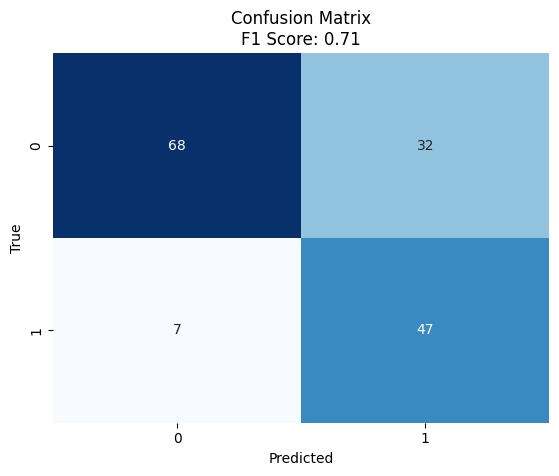

In [235]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, predict_result)

# 혼동 행렬 시각화
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title(f'Confusion Matrix\nF1 Score: {final_score:.2f}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Glucose: 0.5490743918581985
BMI: 0.16479791934950724
SkinThickness: 0.11191355959734617
Age: 0.11076753203201083
Insulin: 0.0634465971629372
Pregnancies_more_than_2: 0.0
Older_Than_30: 0.0
DiabetesPedigreeFunction: 0.0
BloodPressure: 0.0
Pregnancies: 0.0


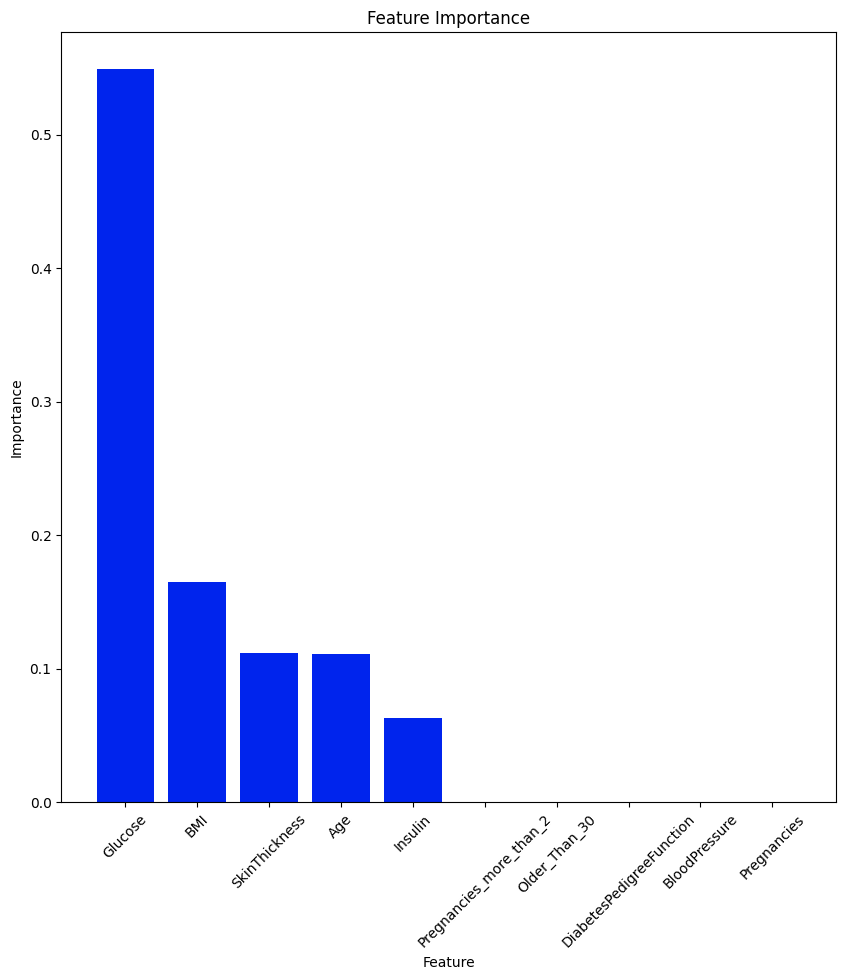

In [239]:
# 추가로 변수 중요도도 확인하기
feature_importance = best_classifier.feature_importances_
feature_names = train_X.columns

sorted_idx = np.argsort(feature_importance)[::-1]

# 정렬된 특성 중요도 및 특성 이름 출력
for idx in sorted_idx:
    print(f"{feature_names[idx]}: {feature_importance[idx]}")

plt.figure(figsize=(10, 10))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_importance)), np.array(feature_names)[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()